## Name : Mihir Hebalkar
## PRN : 22070122120

# K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
data = pd.read_excel('KMeans dataset.xlsx')

In [5]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer ID          20 non-null     int64
 1   Annual Income (USD)  20 non-null     int64
 2   Spending Score       20 non-null     int64
 3   Age                  20 non-null     int64
 4   Purchase Frequency   20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [7]:
X = data[['Annual Income (USD)', 'Spending Score', 'Age', 'Purchase Frequency']]

In [8]:
X = X.dropna()

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
wcss = [] 

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

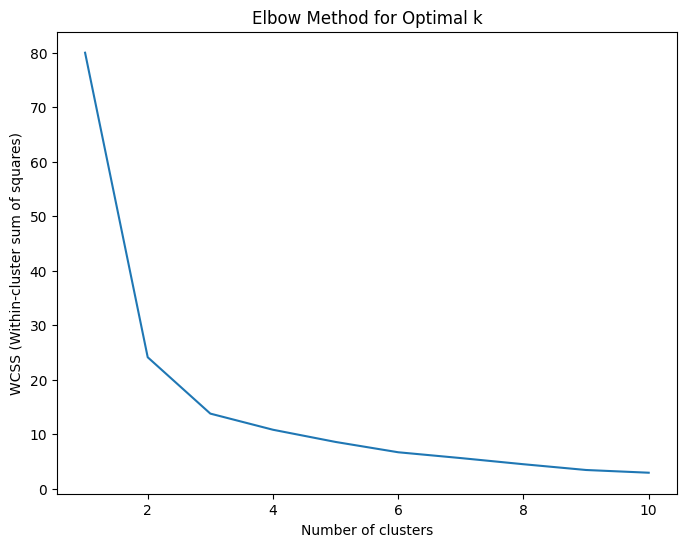

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

### k=3 is optimal clusters.

In [12]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

In [13]:
data['Cluster'] = y_kmeans

In [14]:
data.head()

,Customer ID,Annual Income (USD),Spending Score,Age,Purchase Frequency,Cluster
0,1,15000,39,22,5,1
1,2,40000,75,35,12,2
2,3,100000,60,45,20,0
3,4,25000,40,30,7,1
4,5,60000,55,28,10,2


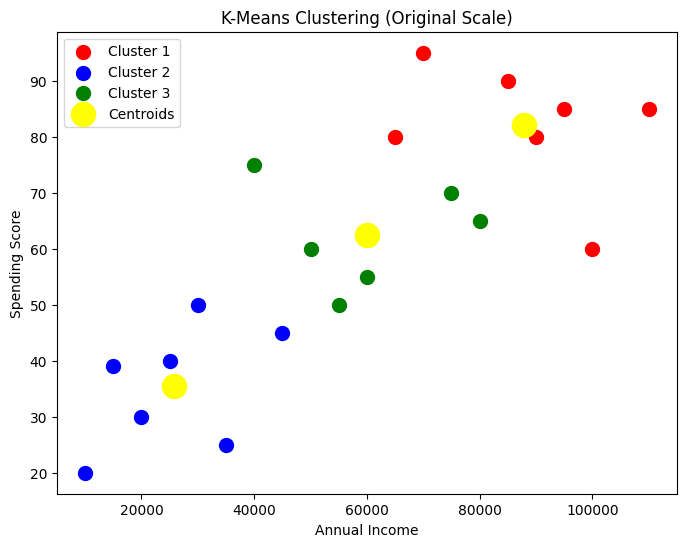

In [ ]:

X_original = scaler.inverse_transform(X_scaled)


plt.figure(figsize=(8, 6))

plt.scatter(X_original[y_kmeans == 0, 0], X_original[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_original[y_kmeans == 1, 0], X_original[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_original[y_kmeans == 2, 0], X_original[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')


plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='yellow', label='Centroids')


plt.title('K-Means Clustering (Original Scale)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
